In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
path = 'edges_file_python.txt'
s=289963
np.random.seed(s)

In [2]:
def adj_mat(path):
    first = []
    second = []
    with open(path, 'r') as f:
        for line in f:
            l = line.strip()
            s = l.split()
            first.append(int(s[0]))
            second.append(int(s[1]))
        n = first[-1]+1 
    G = np.zeros((n, n))
    for i in range(len(first)):
        G[first[i]][second[i]] = 1
    return G, sparse.csr_matrix(G), n

def in_out_degs(G):
    r = np.sum(G, axis=1)
    c = np.sum(G, axis=0)
    return r, c

def hyperlink_mat(n ,G, c):
    M = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if c[j] != 0:
                M[i][j] = G[i][j]/c[j]
    spM = sparse.csr_matrix(M)
    return M, spM

def mod_hyperlink_mat(n, G, c):
    M_hat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if c[j] == 0:
                M_hat[i][j] = float(1/n)
            else:
                M_hat[i][j] = G[i][j]/c[j]
    spM_hat = sparse.csr_matrix(M_hat)
    return M_hat, spM_hat


def power_method(A, tol=1e-16, maxIter=5000, x=None):
    n = A.shape[0]
    if x == None:
        x = np.ones((n,1))
    lambda_old = -1
    error = 1.0
    for i in range(maxIter):
        
        x = np.matmul(A,x)

        # Finding new Eigen value and Eigen vector
        lambda_new = max(abs(x))
        x = abs(x/lambda_new)

        error = abs(lambda_new-lambda_old)
        if error <= tol:
            break
        lambda_old = copy.deepcopy(lambda_new)

    return lambda_new, x/np.sum(x), i+1, error

def google_mat(G, c, alpha):
    n = G.shape[0]
    delta = (1-alpha)/n
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if c[j] == 0:
                A[i][j] = 1/n
            else:
                A[i][j] = alpha*(G[i][j]/c[j])+delta
    return A

def explore_web(A, maxIter=5000, tol=1e-16):
    n = A.shape[0]
    t = np.full((n,1), 1/n)
    A_tmp = copy.deepcopy(A)
    t_prev = copy.deepcopy(t)
    for k in range(maxIter):
        t = np.matmul(A_tmp, t)
        if np.linalg.norm(t_prev-t) <= tol:
            break
        t_prev = copy.deepcopy(t)
    return t, k+1


def matrix_sparser(A, G, c, alpha):
    n = A.shape[0]
    D = np.zeros((n, n))
    z = np.zeros(n)
    e = np.ones(n)
    delta = (1-alpha)/n
    for j in range(n):
        if c[j] != 0:
            D[j][j] = 1 / c[j]
            z[j] = delta
        else:
            z[j] = 1 / n

    return alpha * (G @ D), e * z

def shiftedPowerMethod(A, maxIter=5000, tol=1e-16):
    lambda1, _, _, _ = power_method(A, maxIter=maxIter, tol=tol)
    B = A-abs(lambda1)*np.eye(A.shape[0])
    tmpLambda2, _, _, _ = power_method(B)
    return abs(tmpLambda2)-abs(lambda1)

def shifted_power_method(A, maxIter=5000, tol=1e-16):
    lambda1, v1, _, _ = power_method(A, maxIter=5000, tol=1e-16)
    B = A-abs(lambda1)*np.eye(A.shape[0])
    tmpLambda2, _, _, _ = power_method(B)
    return tmpLambda2



The original adjacency matrix:
[[1. 1. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


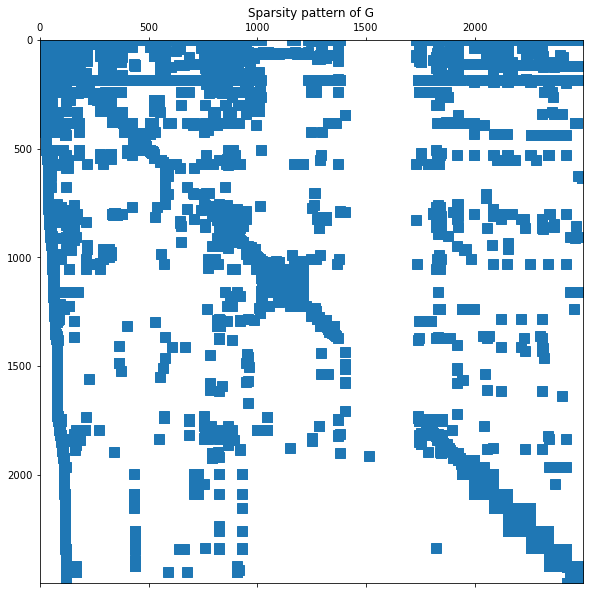

In [3]:

### Q1
G, spG, n = adj_mat(path)
print('The original adjacency matrix:')
print(G)
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.set_title('Sparsity pattern of G')
ax1.spy(spG)
fig1.savefig('fig1.eps', format='eps')

plt.show()


In [4]:
### Q3
r, c =  in_out_degs(G)
print('in-degs vector:')
print(r)
print('out-degs vector:')
print(c)


in-degs vector:
[1109.    3.    2. ...    5.    5.    4.]
out-degs vector:
[179.  13.   0. ...  35.  36.   0.]


The hyperlink matrix:
[[0.00558659 0.07692308 0.         ... 0.02857143 0.02777778 0.        ]
 [0.00558659 0.         0.         ... 0.         0.         0.        ]
 [0.00558659 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.02857143 0.02777778 0.        ]
 [0.         0.         0.         ... 0.02857143 0.02777778 0.        ]
 [0.         0.         0.         ... 0.         0.02777778 0.        ]]


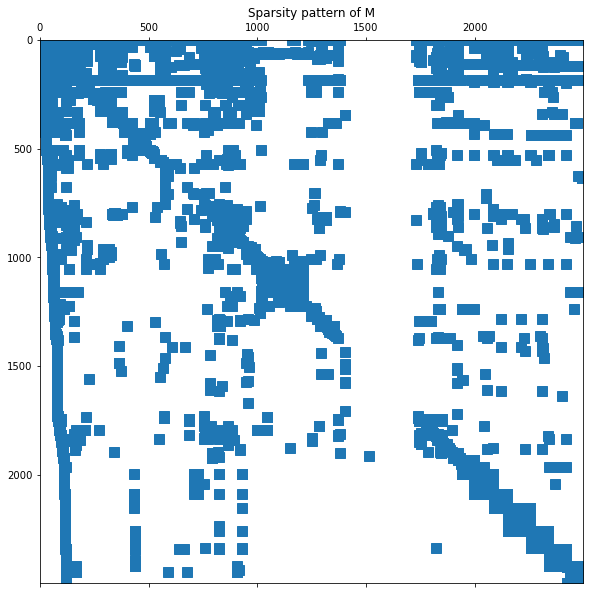

In [5]:
### Q5
M, spM = hyperlink_mat(n, G, c)
print('The hyperlink matrix:')
print(M)
fig2, ax2 = plt.subplots(figsize=(10, 10))
ax2.set_title('Sparsity pattern of M')
ax2.spy(spM)
fig2.savefig('fig2.eps', format='eps')

plt.show()

The modified hyperlink matrix:


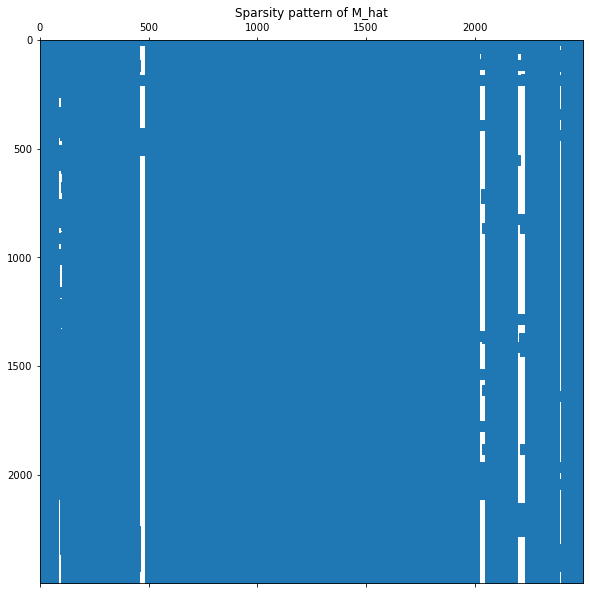

In [6]:
### Q7
M_hat, spM_hat = mod_hyperlink_mat(n, G, c)
print('The modified hyperlink matrix:')
fig3, ax3 = plt.subplots(figsize=(10, 10))
ax3.set_title('Sparsity pattern of M_hat')
ax3.spy(spM_hat)
# fig3.savefig('fig3.eps', format='eps')

plt.show()

In [7]:
### Q10
eigsM, vecsM = np.linalg.eig(M_hat)
lambda1M, v1M, iterM, errM = power_method(M_hat, tol=1e-16, maxIter=5000)
print('The convergence rate for M_hat power method:', abs(eigsM[1])/abs(eigsM[0]))
print('The dominant eigenvalue modulus using power method', lambda1M)
print('The dominant eigenvalue modulus using the direct method (numpy):', abs(eigsM[0]))
print('The dominant eigenvector using the power method:\n', abs(vecsM[:,0])/np.sum(abs(vecsM[:,0])))
print('The dominant eigenvector using the direct method (numpy):\n', v1M)
print('Relative error between eigenvalues:', abs(lambda1M-abs(eigsM[0])/abs(eigsM[0])))
print('Number of iterations needed for convergence:', iterM)

The convergence rate for M_hat power method: 1.0
The dominant eigenvalue modulus using power method [1.]
The dominant eigenvalue modulus using the direct method (numpy): 1.0
The dominant eigenvector using the power method:
 [0. 0. 0. ... 0. 0. 0.]
The dominant eigenvector using the direct method (numpy):
 [[2.92655381e-13]
 [2.28036935e-15]
 [2.26412470e-15]
 ...
 [1.30981955e-15]
 [1.30981955e-15]
 [1.27208916e-15]]
Relative error between eigenvalues: [4.95159469e-14]
Number of iterations needed for convergence: 3158


In [9]:
### Q12
alpha = 0.85
A = google_mat(G, c, alpha)
print('The Google Matrix:')
print(A)


The Google Matrix:
[[4.80860335e-03 6.54446154e-02 4.00000000e-04 ... 2.43457143e-02
  2.36711111e-02 4.00000000e-04]
 [4.80860335e-03 6.00000000e-05 4.00000000e-04 ... 6.00000000e-05
  6.00000000e-05 4.00000000e-04]
 [4.80860335e-03 6.00000000e-05 4.00000000e-04 ... 6.00000000e-05
  6.00000000e-05 4.00000000e-04]
 ...
 [6.00000000e-05 6.00000000e-05 4.00000000e-04 ... 2.43457143e-02
  2.36711111e-02 4.00000000e-04]
 [6.00000000e-05 6.00000000e-05 4.00000000e-04 ... 2.43457143e-02
  2.36711111e-02 4.00000000e-04]
 [6.00000000e-05 6.00000000e-05 4.00000000e-04 ... 6.00000000e-05
  2.36711111e-02 4.00000000e-04]]


In [10]:
### Q13
converged_exploration, iterConv = explore_web(A, maxIter=5000, tol=1e-16)
print('The PageRank vector resulting from exploring the web:')
print(converged_exploration)
print('The number of iterations needed for exploration to converge:', iterConv)

The PageRank vector resulting from exploring the web:
[[0.0359407 ]
 [0.00032532]
 [0.00032219]
 ...
 [0.00026065]
 [0.00026065]
 [0.00025432]]
The number of iterations needed for exploration to converge: 180


In [11]:
### Q14
eigsA, vecsA = np.linalg.eig(A)
lambda1A, v1A, iterA, errA = power_method(A, tol=1e-16, maxIter=5000)
print('The convergence rate for A power method:', abs(eigsA[1])/abs(eigsA[0]))
print('The dominant eigenvalue modulus using power method', lambda1A)
print('The dominant eigenvalue modulus using the direct method (numpy):', abs(eigsA[0]))
print('The dominant eigenvector using the power method:\n', v1A)
print('The dominant eigenvector using the direct method (numpy):\n', abs(vecsA[:,0]/np.sum(abs(vecsA[:,0]))))
print('Relative error between eigenvalues:', abs((lambda1A-abs(eigsA[0]))/abs(eigsA[0])))
print('Number of iterations needed for convergence:', iterA)
print('The norm of difference between the actual dominant eigenvector and the approximate one:')
print(np.linalg.norm(abs(vecsA[:,0]/np.sum(abs(vecsA[:,0])))-v1A.ravel()))
print('The norm of difference between the actual dominant eigenvector (PageRank vector) and the result of question 13:')
print(np.linalg.norm(abs(vecsA[:,0]/np.sum(abs(vecsA[:,0])))-converged_exploration.ravel()))


The convergence rate for A power method: 0.8430843682029976
The dominant eigenvalue modulus using power method [1.]
The dominant eigenvalue modulus using the direct method (numpy): 0.9999999999999989
The dominant eigenvector using the power method:
 [[0.0359407 ]
 [0.00032532]
 [0.00032219]
 ...
 [0.00026065]
 [0.00026065]
 [0.00025432]]
The dominant eigenvector using the direct method (numpy):
 [0.0359407  0.00032532 0.00032219 ... 0.00026065 0.00026065 0.00025432]
Relative error between eigenvalues: [1.11022302e-15]
Number of iterations needed for convergence: 179
The norm of difference between the actual dominant eigenvector and the approximate one:
3.8074355366963485e-16
The norm of difference between the actual dominant eigenvector (PageRank vector) and the result of question 13:
2.96316678647284e-16


In [12]:
### Q15
print("Google matrix as sum of a sparse matrix and a coefficient matrix")
print(matrix_sparser(A, G, c, alpha))

Google matrix as sum of a sparse matrix and a coefficient matrix
(array([[0.0047486 , 0.06538462, 0.        , ..., 0.02428571, 0.02361111,
        0.        ],
       [0.0047486 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0047486 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.02428571, 0.02361111,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02428571, 0.02361111,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02361111,
        0.        ]]), array([6.e-05, 6.e-05, 4.e-04, ..., 6.e-05, 6.e-05, 4.e-04]))


In [13]:
### Q17
lambda2M = shifted_power_method(M_hat, maxIter=5000, tol=1e-16)
print('The second M_hat dominant eigenvalue modulus using power method', lambda2M)
print('The second M_hat dominant eigenvalue modulus using the direct method (numpy):', abs(eigsM[1]))
print('Relative error between eigenvalues:', abs((lambda2M-abs(eigsM[1]))/abs(eigsM[1])))

The second M_hat dominant eigenvalue modulus using power method [0.97921497]
The second M_hat dominant eigenvalue modulus using the direct method (numpy): 1.0
Relative error between eigenvalues: [0.02078503]


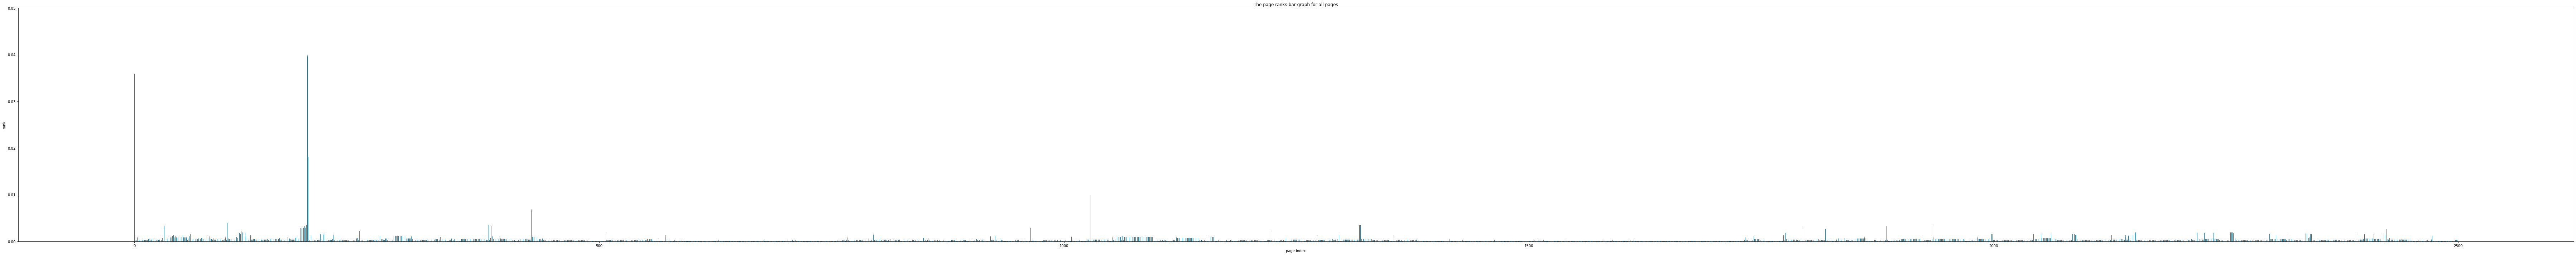

In [14]:
### Q19
page_rank_vector=v1A.ravel()
fig4, ax = plt.subplots(figsize=(100,10))
x = np.argsort(page_rank_vector)
width = 0.35
sortedVector = np.sort(page_rank_vector)
ax.bar(x, sortedVector, width=width),
ax.set_ylim(0,0.05)
ax.set_xlabel('page index')
ax.set_ylabel('rank')
ax.set_title('The page ranks bar graph for all pages')
fig4.tight_layout()
fig4.savefig('fig4.eps', format='eps')


The indices of the highest page ranks
[ 186    0  187 1029  427   75  100  381  185 1318 1319  384]
The 12 highest page ranks:
[0.03983702257695924, 0.03594070269968491, 0.0180663301253158, 0.00997644966329324, 0.006803101148902153, 0.004027109476322264, 0.003998714651988464, 0.0035014808499048114, 0.0034858351045787836, 0.003411940599247278, 0.0034119405992472725, 0.003306607947643815]
The in-degs of the 12 highest page ranks
[1112. 1109.  283.   29.   70.   38.   16.  160.   35.   30.   30.   41.]
The out-degs of the 12 highest page ranks
[ 13. 179.   3.   0.   1.  31.  14.   0.   1.   1.   1.   1.]


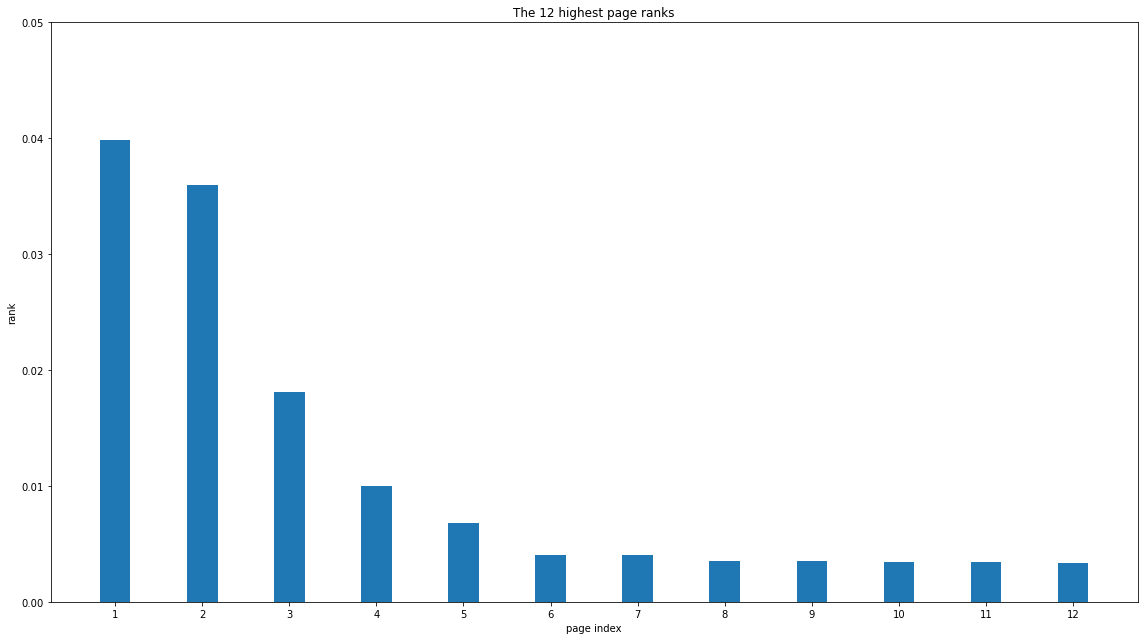

In [15]:



    sorted_probs = []
    sorted_ranks_ind = []
    counter = 1
    for i in np.flip(x):
        if counter == 13:
            break
        sorted_ranks_ind.append(counter)
        sorted_probs.append(page_rank_vector[i])
        counter += 1

    fig5, ax = plt.subplots(figsize=(16,9))
    inds = sorted_ranks_ind
    sortedVector = sorted_probs
    ax.bar(inds, sortedVector, width=0.35)
    ax.set_xticks(inds)
    ax.set_ylim(0,0.05)
    ax.set_xlabel('page index')
    ax.set_ylabel('rank')
    ax.set_title('The 12 highest page ranks')
    fig5.tight_layout()
    fig5.savefig('fig5.eps', format='eps')

    indices12 = np.flip(x)[:12]
    outs = c[np.array(indices12)]
    ins = r[np.array(indices12)]
    print('The indices of the highest page ranks')
    print(indices12)
    print('The 12 highest page ranks:')
    print(sortedVector)
    print('The in-degs of the 12 highest page ranks')
    print(ins)
    print('The out-degs of the 12 highest page ranks')
    print(outs)

    plt.show()